In [2]:
import os
from pathlib import Path
import rasterio
import numpy as np
import geopandas as geopd
import os
import pandas as pd
import shutil

np.seterr(divide='ignore', invalid='ignore')
os.chdir("/home/me/workspace/det_remota/trabalho_final")

<Axes: >

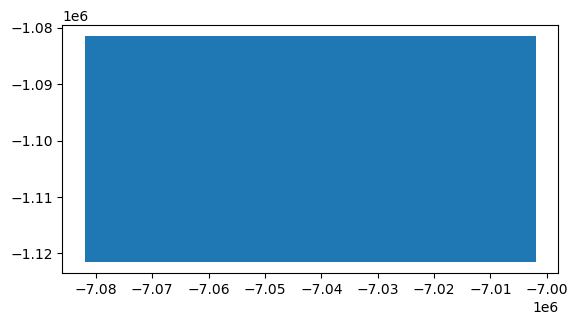

In [4]:
focal_area_shp = geopd.read_file('data/qgis_outputs/focal_study_area.shp')
focal_area_shp.plot()

In [10]:
INPUT_PATH = Path('data/sentinel2/normalized')
OUTPUT_PATH = Path('data/sentinel2/focal_study_area')

import rasterio.mask

mask_shapes = focal_area_shp.geometry.values

for raster_path in INPUT_PATH.glob('*.tiff'):
    with rasterio.open(raster_path) as src:
        out_image, out_transform = rasterio.mask.mask(src, mask_shapes, crop=True)
        out_meta = src.meta
    
    input_filename = str(raster_path).split('/')[-1].replace('.tiff', '')
    cropped_raster_path = OUTPUT_PATH.joinpath(f'{input_filename}.tiff')
    
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

    with rasterio.open(cropped_raster_path, "w", **out_meta) as dest:
        dest.write(out_image)

    print(f"Cropped file {raster_path}")

Cropped file data/sentinel2/normalized/2017_08.tiff
Cropped file data/sentinel2/normalized/2018_08.tiff
